<a href="https://www.kaggle.com/fatihersoy/melbourne-house-prices-hypothesis-testing?scriptVersionId=84223911" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In this study, I will try to do basic hypothesis testing for Abbotsford district of Melbourne. 



* *Null hypothesis*: house prices in Abbotsford-Melbourne are more expensive than in Melbourne general
* *Alternative Hypothesis*: house prices in Abbotsford-Melbourne are not more expensive than in Melbourne

In [1]:
import numpy as np
import pandas as pd
from numpy import sqrt, abs, round
from scipy.stats import norm, uniform, zscore
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing

In [2]:
df = pd.read_csv("../input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


We have chosen the Abbotsford Subsurb of Melbourne to test. We will basically look if the house prices are more expensive in Abbotsford than in Melbourne general. You can freely pick any other suburb or region to test.

In [4]:
df_without_null_prices = df[~df["Price"].isnull()]
prices = df_without_null_prices["Price"]
prices

0        1490000.0
1        1220000.0
2        1420000.0
3        1515000.0
4         670000.0
           ...    
63016     347700.0
63017     808000.0
63018     566000.0
63019     500000.0
63020     545000.0
Name: Price, Length: 48433, dtype: float64

In [5]:
in_abbotsford = df_without_null_prices.loc[df["Suburb"] == "Abbotsford"]
prices_in_abbotsford = in_abbotsford["Price"]
prices_in_abbotsford

0        1490000.0
1        1220000.0
2        1420000.0
670      1350000.0
1622      830000.0
           ...    
61303     666000.0
61304     930000.0
61733    1030000.0
61735     927000.0
62222     750000.0
Name: Price, Length: 142, dtype: float64

In [6]:
prices_in_abbotsford_mean = prices_in_abbotsford.mean()
prices_in_abbotsford_mean

1040200.7042253522

In [7]:
prices_mean = prices.mean()
prices_mean

997898.2414882415

In [8]:
prices_in_abbotsford_std = prices_in_abbotsford.std()
prices_in_abbotsford_std

374652.7473051951

In [9]:
prices_std = prices.std()
prices_std

593498.9190372757

In [10]:
prices_in_abbotsford_len = len(prices_in_abbotsford)
prices_in_abbotsford_len
prices_len = len(prices)
prices_len

48433

In [11]:
min_price = prices.min()
max_price = prices.max()
min_abbotsford_price = prices_in_abbotsford.min()
max_abbotsford_price = prices_in_abbotsford.max()

In [12]:
standard_error = prices_std / sqrt(prices_in_abbotsford_len)
standard_error

49805.32290253178

As the hypothesis are declared, it’s known that Abbotsford is a district of Melbourne. First the population mean and standard deviation and the sample
(Abbotrsford) mean and population has been calculated.
* Melbourne house prices mean: 997,898
* Melbourne house prices standard deviation: 593,498
* Abbotsford house prices mean: 1,040,200
* Abbotsford house prices standard deviation: 374,652

After that it’s found how Abbotsford mean is diversed against the total population in manner of standard error units. The calculation result was:
* se units: 0.84, p value: 0.39

In [13]:
mean_diff = prices_in_abbotsford_mean - prices_mean

In [14]:
standard_errors_away = mean_diff / standard_error
standard_errors_away

0.8493562589664546

In [15]:
p_value = 2 * (1-norm.cdf(abs(standard_errors_away)))
p_value

0.3956830847123247

In [16]:
mu = prices_mean
sigma = prices_std / sqrt(prices_in_abbotsford_len)

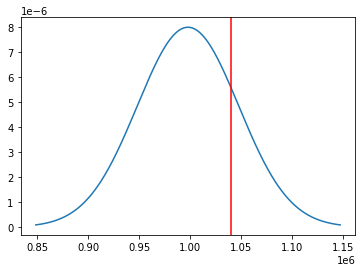

In [17]:
#sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, len(prices))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.axvline(x=prices_in_abbotsford_mean, color="r")
plt.show()

In [18]:
sigma

49805.32290253178

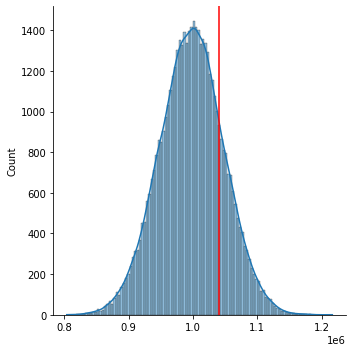

In [19]:
import seaborn as sns
value = np.random.normal(loc=prices_mean,scale=sigma,size=len(prices))
sns.displot(value, kde=True)
plt.axvline(prices_in_abbotsford_mean, color='red') # Plot a vertical line at corresponding x

So the mean of Abbotsford house prices were 0.84 standard error units higher than the mean of the population. I preferred to synchronize to the general convention for se level of 1.645 and p value level of 0.05. Since our scores of se 0.84 < 1.645 and p value of 0.39 > 0.05, so the hypothesis of house prices in Abbotsford-Melbourne are more expensive than in Melbourne general is rejected. We can assume the houses in Abbotsford are not much more expensive than the total population, which is, Melbourne. Since standard error unit is found 49,805 (dollars), and Abbotsford house price mean is 0.84 standard error units away, 49,805 (dollars) * 0,84 = 41.836 (dollars). So that means Abbotsford mean house price is 41.836 away from the mean of Melbourne house price. 

We can see the result graphs above. This is not the standardized normal distribution, so this needed to be explained. In the plotted graphs, 1.0 means 1.0 trillion dollars, and 1.1 is also 1.1 trillion dollars and from the red line which represents Abbotsford mean house prices, we can clearly see on the plot that it is deviated 41.836 (dollars).